Projeto Transcrevendo uma Imagem em Texto com AWS Textract 

OCR com AWS TEXTRACT

Este Projeto foi realizado por Maurício André de Almeida como trabalho no curso de Nexa - Análise Avançada de Imagens e Texto com IA na AWS
        

In [16]:
import boto3
import json
import matplotlib.pyplot as plt
import matplotlib.image as img

Conectando no TEXTRACT e enviando o documento para reconhecimento de texto

In [6]:
client = boto3.client('textract')

filename = './Images/lista-material-escolar.jpg'
with open(filename, 'rb') as document:
    # Call Amazon Textract
    response = client.detect_document_text(
        Document={'Bytes': document.read()})
    


Visualizando o arquivo original:

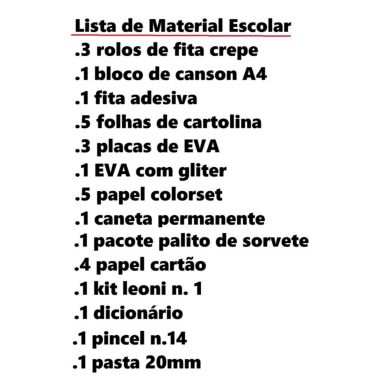

In [19]:
imagem = img.imread(filename)
plt.imshow(imagem)
plt.axis('off')
plt.show()

Visualizando o json recebido como resposta:

In [14]:
print("JSON response:")
print("===================================")
print(json.dumps(response, indent=4, sort_keys=True))

JSON response:
{
    "Blocks": [
        {
            "BlockType": "PAGE",
            "Geometry": {
                "BoundingBox": {
                    "Height": 1.0,
                    "Left": 0.0,
                    "Top": 0.0,
                    "Width": 1.0
                },
                "Polygon": [
                    {
                        "X": 0.0,
                        "Y": 0.0
                    },
                    {
                        "X": 1.0,
                        "Y": 2.114239379125138e-07
                    },
                    {
                        "X": 1.0,
                        "Y": 1.0
                    },
                    {
                        "X": 2.533423412387492e-06,
                        "Y": 1.0
                    }
                ]
            },
            "Id": "478aba95-8285-49fe-9d6a-d991e759baa9",
            "Relationships": [
                {
                    "Ids": [
                        "1957c9a

#Exibindo as linhas de texto reconhecidas:

In [13]:
print("Texto reconhecido para o arquivo: " + filename)
print("=======================================================================")
print("Linhas de texto reconhecidas:")
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print("=> {}".format(item["Text"]))


Texto reconhecido para o arquivo: ./Images/lista-material-escolar.jpg
Linhas de texto reconhecidas:
=> Lista de Material Escolar
=> .3 rolos de fita crepe
=> .1 bloco de canson A4
=> .1 fita adesiva
=> .5 folhas de cartolina
=> .3 placas de EVA
=> .1 EVA com gliter
=> .5 papel colorset
=> .1 caneta permanente
=> .1 pacote palito de sorvete
=> .4 papel cartão
=> .1 kit leoni n. 1
=> .1 dicionário
=> .1 pincel n.14
=> .1 pasta 20mm
